### Raw signal

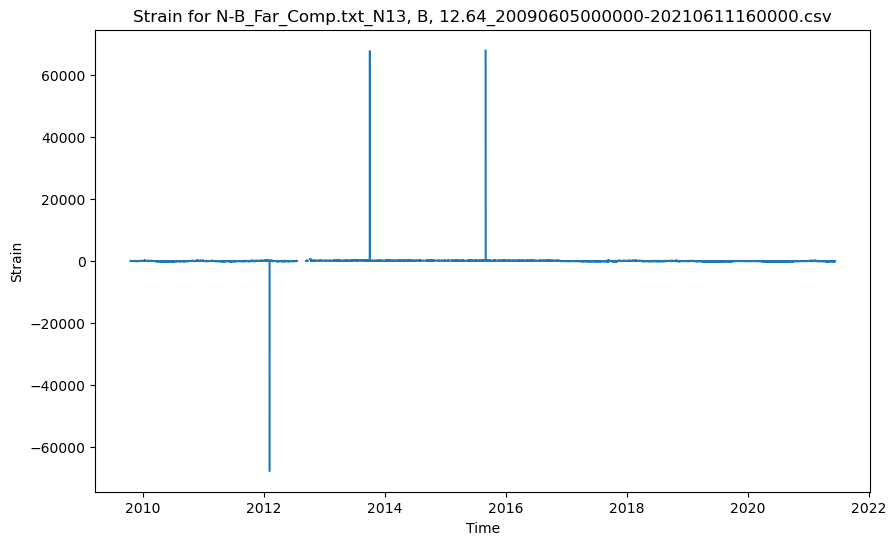

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

folder = '../timeseries_csv/'
file = 'N-B_Far_Comp.txt_N13, B, 12.64_20090605000000-20210611160000.csv'
# file = 'EI_N-B_Far_Comp.txt_N13, B, 12.64_comp_20090605000000-20210611160000.csv'

df = pd.read_csv(folder + file, parse_dates=['Time'])

#Choose start and end time (start '2009-06-05 00:00:00', end '2021-06-11 16:00:00')
# start_time = '2013-06-03 08:00:00'
# end_time = '2021-06-11 16:00:00'

# df = df[(df['Time'] >= start_time) & (df['Time'] <= end_time)]


plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Strain'], linestyle='-')
plt.xlabel('Time')
plt.ylabel('Strain')
plt.title(f'Strain for {file}')
plt.show()

### Cleaning zeros and extreme outliers

           Time_index                Time  Strain
7      20091016200000 2009-10-16 20:00:00     0.0
18     20091018160000 2009-10-18 16:00:00     0.0
98     20091101000000 2009-11-01 00:00:00     0.0
102    20091101160000 2009-11-01 16:00:00     0.0
303    20091205040000 2009-12-05 04:00:00     0.0
...               ...                 ...     ...
22530  20200227200000 2020-02-27 20:00:00     0.0
24346  20201227080000 2020-12-27 08:00:00     0.0
24410  20210107000000 2021-01-07 00:00:00     0.0
24537  20210128080000 2021-01-28 08:00:00     0.0
24633  20210213080000 2021-02-13 08:00:00     0.0

[67 rows x 3 columns]


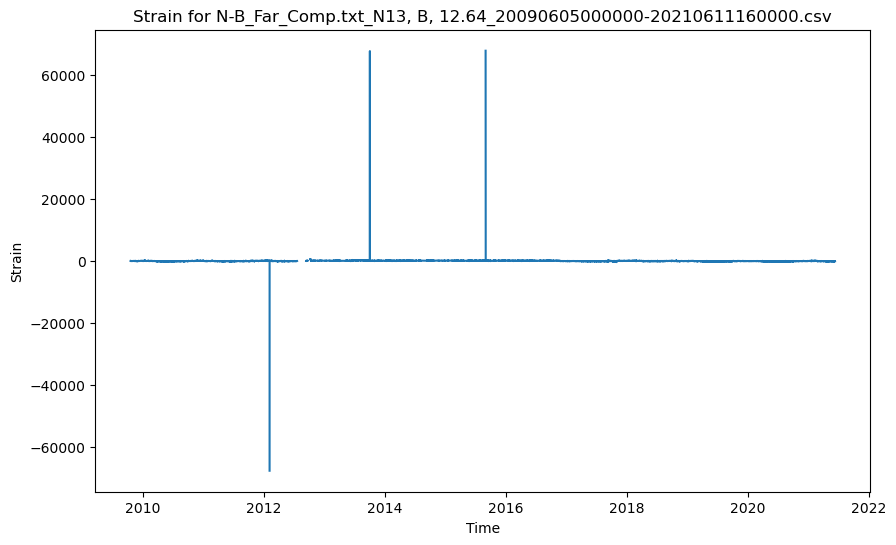

In [21]:
#Find values of strain that are exactly zero
df_zero = df[df["Strain"] == 0]
print(df_zero)

#Remove rows with strain values of zero and plot
indices_to_remove = df_zero.index
df = df.drop(index=indices_to_remove)
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Strain'], linestyle='-')
plt.xlabel('Time')
plt.ylabel('Strain')
plt.title(f'Strain for {file}')
plt.show()

Lower bound = -239.0 Extreme lower bound = -419.0
Upper bound = 241.0 Extreme upper bound = 421.0


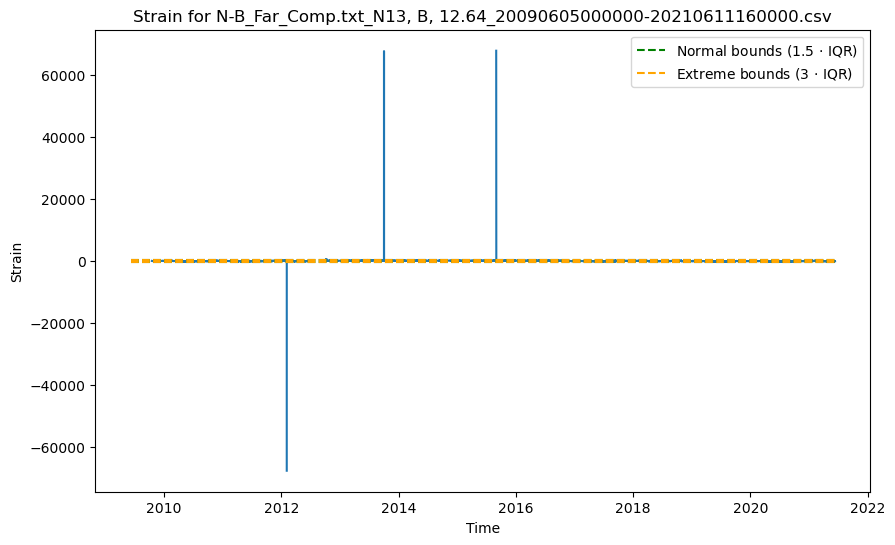

Number of mild outliers (1.5 × IQR): 37
Number of extreme outliers (3 × IQR): 28


In [22]:
# Compute IQR
Q1 = df['Strain'].quantile(0.25)  # 25th percentile
Q3 = df['Strain'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1

# Define bounds for extreme outliers
lower_bound = Q1 - 1.5 * IQR
lower_bound_extreme = Q1 - 3 * IQR
upper_bound = Q3 + 1.5 * IQR
upper_bound_extreme = Q3 + 3 * IQR
print(f'Lower bound = {lower_bound} Extreme lower bound = {lower_bound_extreme}')
print(f'Upper bound = {upper_bound} Extreme upper bound = {upper_bound_extreme}')


plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Strain'], linestyle='-')
plt.xlabel('Time')
plt.ylabel('Strain')
plt.title(f'Strain for {file}')
plt.hlines(y=[lower_bound, upper_bound], xmin=df['Time'].iloc[0], xmax=df['Time'].iloc[-1], 
           colors='green', linestyles='dashed', label=r'Normal bounds (1.5 $\cdot$ IQR)')
plt.hlines(y=[lower_bound_extreme, upper_bound_extreme], xmin=df['Time'].iloc[0], xmax=df['Time'].iloc[-1], 
           colors='orange', linestyles='dashed', label=r'Extreme bounds (3 $\cdot$ IQR)')
plt.legend()
plt.show()

mild_outliers = df[(df['Strain'] < lower_bound) | (df['Strain'] > upper_bound)]
mild_outlier_indices = mild_outliers.index  # Save the indices of mild outliers
num_mild_outliers = mild_outliers.shape[0]

# Count extreme outliers (outside 3 * IQR)
extreme_outliers = df[(df['Strain'] < lower_bound_extreme) | (df['Strain'] > upper_bound_extreme)]
extreme_outlier_indices = extreme_outliers.index  # Save the indices of extreme outliers
num_extreme_outliers = extreme_outliers.shape[0]

# Print results
print(f'Number of mild outliers (1.5 × IQR): {num_mild_outliers}')
print(f'Number of extreme outliers (3 × IQR): {num_extreme_outliers}')

Number of outliers replaced with NaN: 28


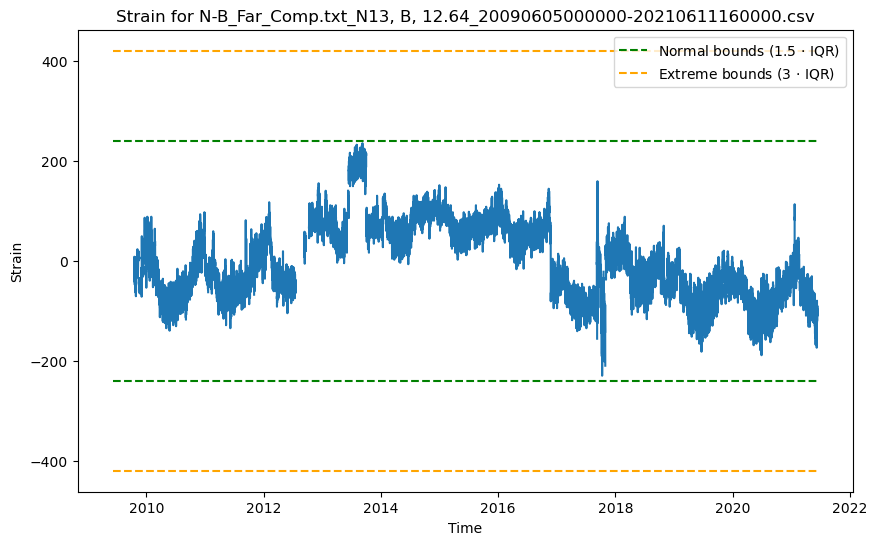

In [23]:
# Replace extreme outliers with NaN
df.loc[mild_outlier_indices, 'Strain'] = np.nan  # Using np.nan to replace the outlier values
print(f'Number of outliers replaced with NaN: {len(extreme_outlier_indices)}')

plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Strain'], linestyle='-')
plt.xlabel('Time')
plt.ylabel('Strain')
plt.title(f'Strain for {file}')
plt.hlines(y=[lower_bound, upper_bound], xmin=df['Time'].iloc[0], xmax=df['Time'].iloc[-1], 
           colors='green', linestyles='dashed', label=r'Normal bounds (1.5 $\cdot$ IQR)')
plt.hlines(y=[lower_bound_extreme, upper_bound_extreme], xmin=df['Time'].iloc[0], xmax=df['Time'].iloc[-1], 
           colors='orange', linestyles='dashed', label=r'Extreme bounds (3 $\cdot$ IQR)')
plt.legend()
plt.show()

### Shifts and scales
Handles the shift in equilibrium as well as the changed scales after each interruption

C:\Users\hpl886\AppData\Local\Temp\ipykernel_34200\2544313513.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


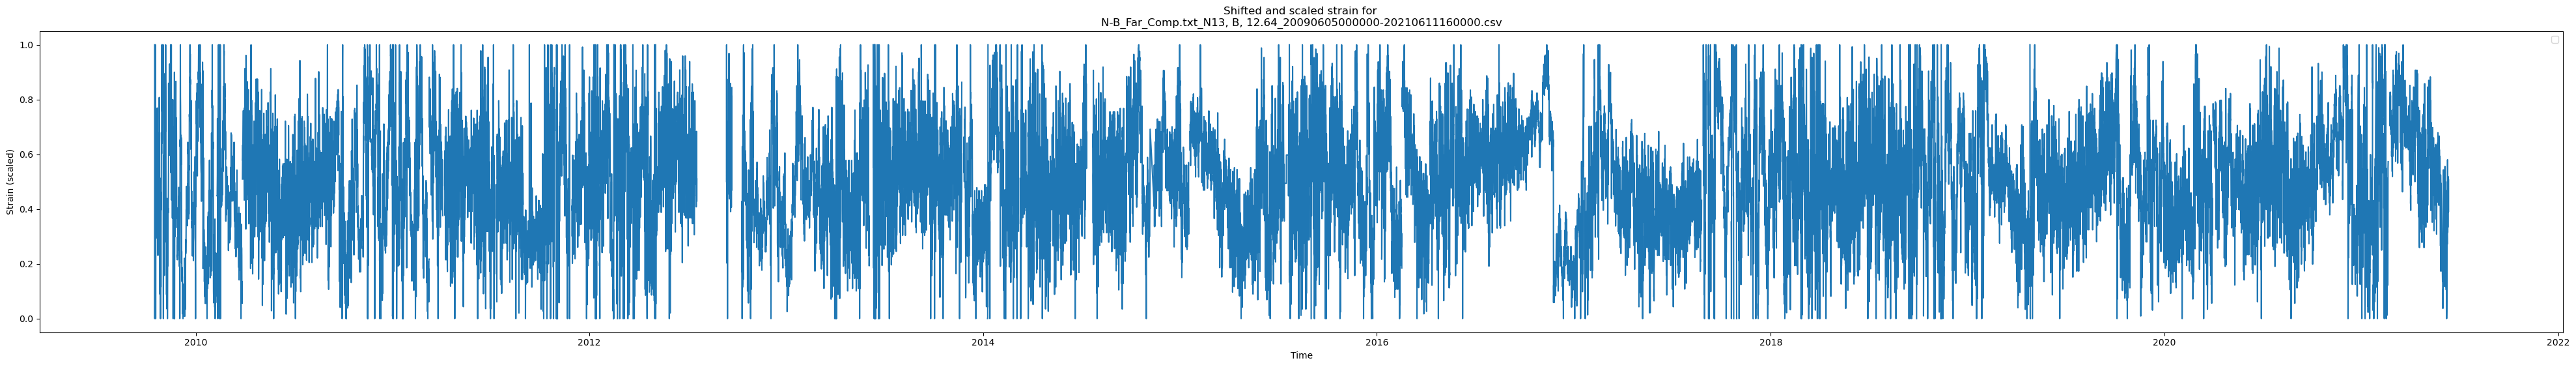

In [24]:
import shift_segments #shift_segments.py

shift_segments.shift_scale(df)

plt.figure(figsize=(50, 6))
plt.plot(df['Time'], df['Strain'], linestyle='-')
plt.xlabel('Time')
plt.ylabel('Strain (scaled)')
plt.title(f'Shifted and scaled strain for \n{file}')
plt.legend()
plt.show()

### Handeling missing values

Lenght: 312, Start Time: 2012-07-18 12:00:00, End Time: 2012-09-11 04:00:00
Lenght: 109, Start Time: 2012-09-21 08:00:00, End Time: 2012-10-09 08:00:00
Lenght: 67, Start Time: 2014-07-11 12:00:00, End Time: 2014-07-22 12:00:00
Lenght: 23, Start Time: 2011-11-25 16:00:00, End Time: 2011-11-29 08:00:00
Lenght: 21, Start Time: 2013-11-22 00:00:00, End Time: 2013-11-25 08:00:00
Lenght: 19, Start Time: 2011-10-28 04:00:00, End Time: 2011-10-31 04:00:00
Lenght: 18, Start Time: 2014-03-07 08:00:00, End Time: 2014-03-10 04:00:00
Lenght: 16, Start Time: 2017-08-25 16:00:00, End Time: 2017-08-28 04:00:00
Lenght: 15, Start Time: 2018-11-02 20:00:00, End Time: 2018-11-05 04:00:00
Lenght: 13, Start Time: 2014-01-29 08:00:00, End Time: 2014-01-31 08:00:00
Lenght: 13, Start Time: 2015-01-17 04:00:00, End Time: 2015-01-19 04:00:00
Lenght: 12, Start Time: 2012-05-05 08:00:00, End Time: 2012-05-07 04:00:00
Lenght: 9, Start Time: 2017-10-20 12:00:00, End Time: 2017-10-21 20:00:00
Lenght: 9, Start Time: 2

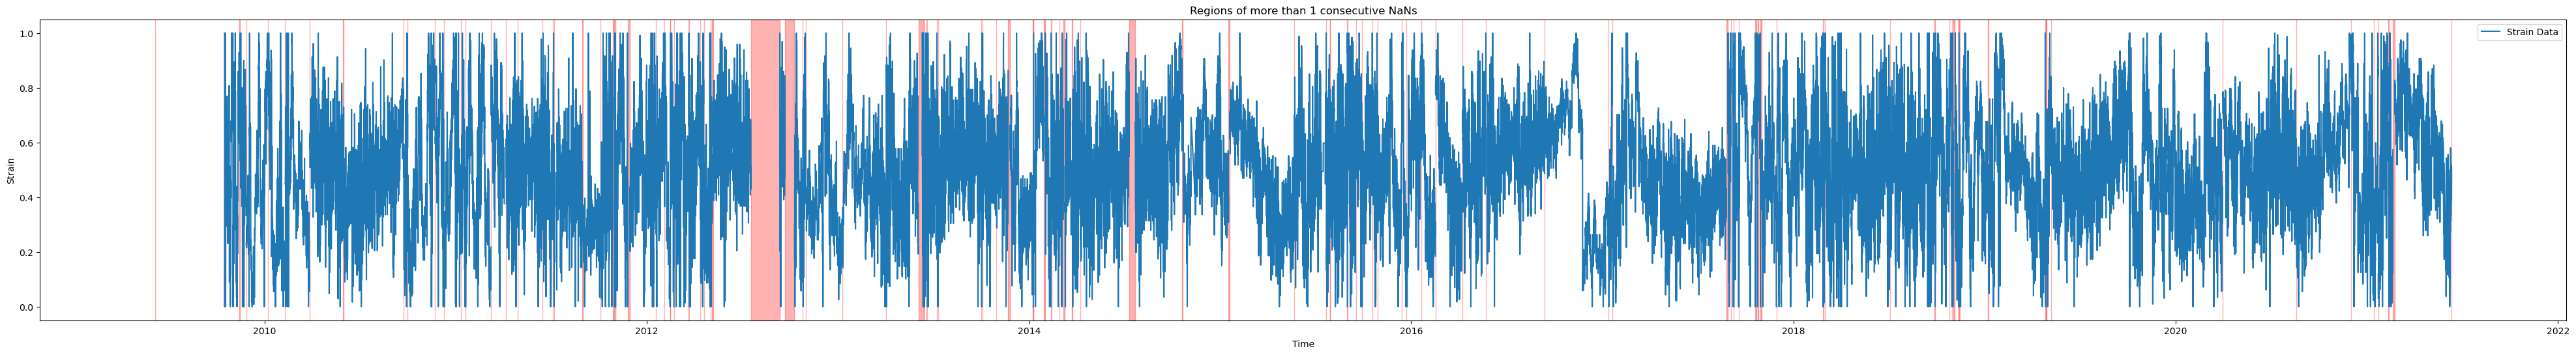

In [25]:
#indentify the regions of missing values
import nan_regions #nan_regions.py

thresholds = [1] # Choose the threshold(s) for consecutive NaNs

for threshold in thresholds:
    consecutive_nan_regions, nan_regions_sorted = nan_regions.find_nan_regions(df, threshold=1)
    # Plot the data
    plt.figure(figsize=(50, 6))
    plt.plot(df['Time'], df['Strain'], linestyle='-', label="Strain Data")

    # Labels and title
    plt.xlabel('Time')
    plt.ylabel('Strain')
    plt.title(f'Regions of more than {threshold} consecutive NaNs')
    plt.legend()

    # Shade regions with more than x consecutive NaNs
    for start, end in consecutive_nan_regions:
        plt.axvspan(df['Time'].loc[start], df['Time'].loc[end], color='red', alpha=0.3)
    
    for column in nan_regions_sorted:
        print(f"Lenght: {column[4]}, Start Time: {column[2]}, End Time: {column[3]}")
    plt.show()

In [26]:
import interpolate_nan #interpolate_nan.py

interpolate_threshold = 3
df_filled = interpolate_nan.interpolate(df, nan_regions_sorted, interpolate_threshold)
df = df_filled

Region to fill: 
   Length: 3 steps
   Start Time: 2013-06-03 08:00:00
   End Time: 2013-06-10 08:00:00
7898
Both indices (7898, 7902) are valid -> interpolate 3 steps
target: 7899
Interpolated value at index 7899: 0.4151376146788991
target: 7900
Interpolated value at index 7900: 0.6100917431192661
target: 7901
Interpolated value at index 7901: 0.805045871559633
Start value: 0.22018348623853215
End value: 1.0 

Region to fill: 
   Length: 3 steps
   Start Time: 2013-10-03 08:00:00
   End Time: 2013-10-03 16:00:00
8590
Both indices (8590, 8594) are valid -> interpolate 3 steps
target: 8591
Interpolated value at index 8591: 0.6243589743589744
target: 8592
Interpolated value at index 8592: 0.6717948717948719
target: 8593
Interpolated value at index 8593: 0.7192307692307693
Start value: 0.576923076923077
End value: 0.7666666666666667 

Region to fill: 
   Length: 3 steps
   Start Time: 2017-10-19 00:00:00
   End Time: 2017-10-19 08:00:00
17374
Both indices (17374, 17378) are valid -> inter

Lenght: 312, Start Time: 2012-07-18 12:00:00, End Time: 2012-09-11 04:00:00
Lenght: 109, Start Time: 2012-09-21 08:00:00, End Time: 2012-10-09 08:00:00
Lenght: 67, Start Time: 2014-07-11 12:00:00, End Time: 2014-07-22 12:00:00
Lenght: 23, Start Time: 2011-11-25 16:00:00, End Time: 2011-11-29 08:00:00
Lenght: 21, Start Time: 2013-11-22 00:00:00, End Time: 2013-11-25 08:00:00
Lenght: 19, Start Time: 2011-10-28 04:00:00, End Time: 2011-10-31 04:00:00
Lenght: 18, Start Time: 2014-03-07 08:00:00, End Time: 2014-03-10 04:00:00
Lenght: 16, Start Time: 2017-08-25 16:00:00, End Time: 2017-08-28 04:00:00
Lenght: 15, Start Time: 2018-11-02 20:00:00, End Time: 2018-11-05 04:00:00
Lenght: 13, Start Time: 2014-01-29 08:00:00, End Time: 2014-01-31 08:00:00
Lenght: 13, Start Time: 2015-01-17 04:00:00, End Time: 2015-01-19 04:00:00
Lenght: 12, Start Time: 2012-05-05 08:00:00, End Time: 2012-05-07 04:00:00
Lenght: 9, Start Time: 2017-10-20 12:00:00, End Time: 2017-10-21 20:00:00
Lenght: 9, Start Time: 2

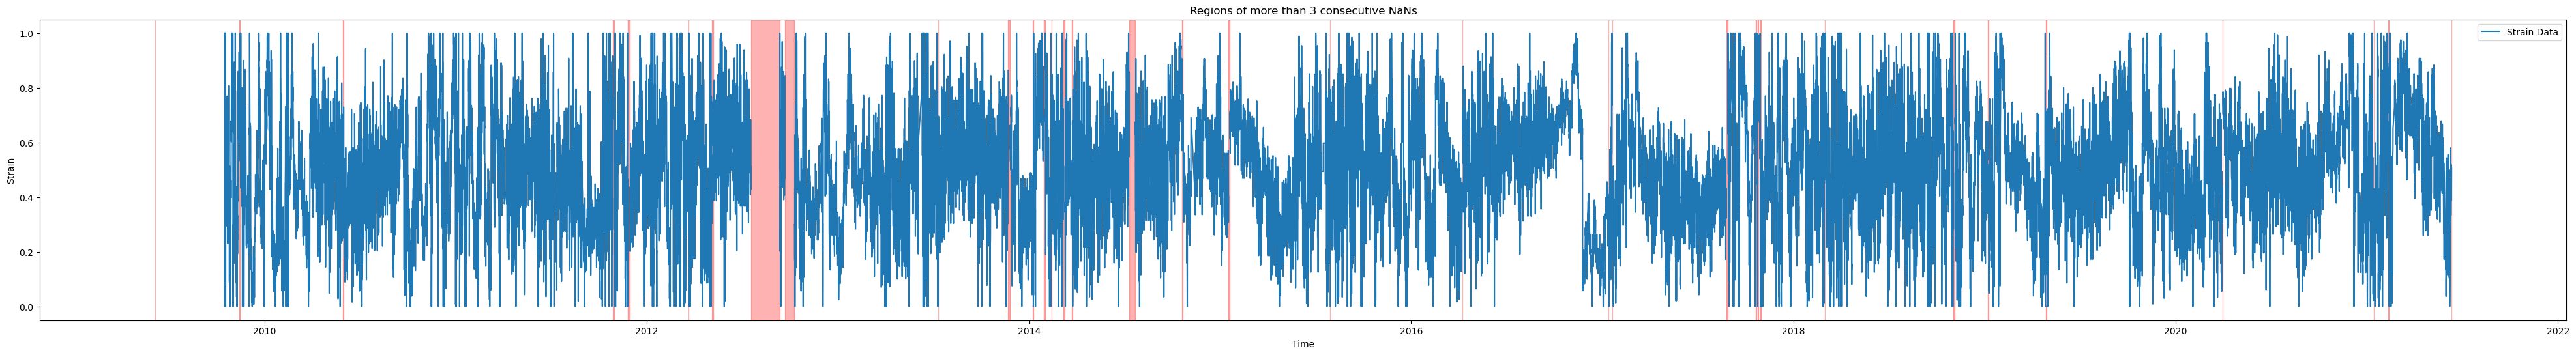

In [27]:
import nan_regions #nan_regions.py
thresholds = [interpolate_threshold] # Choose the threshold(s) for consecutive NaNs

for threshold in thresholds:
    consecutive_nan_regions, nan_regions_sorted = nan_regions.find_nan_regions(df, threshold=1)
    # Plot the data
    plt.figure(figsize=(50, 6))
    plt.plot(df['Time'], df['Strain'], linestyle='-', label="Strain Data")

    # Shade regions with more than x consecutive NaNs
    for start, end in consecutive_nan_regions:
        plt.axvspan(df['Time'].loc[start], df['Time'].loc[end], color='red', alpha=0.3)

    # Labels and title
    plt.xlabel('Time')
    plt.ylabel('Strain')
    plt.title(f'Regions of more than {threshold} consecutive NaNs')
    plt.legend()
    
    for column in nan_regions_sorted:
        print(f"Lenght: {column[4]}, Start Time: {column[2]}, End Time: {column[3]}")
    plt.show()
    